<a href="https://colab.research.google.com/github/Mahdi-Abdollahii/NGC_6822/blob/main/DC_PC/NGC6822_DC_PC_0002.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/Mahdi-Abdollahii/NGC_6822.git

Cloning into 'NGC_6822'...
remote: Enumerating objects: 997, done.
remote: Counting objects: 100% (332/332), done.
remote: Compressing objects: 100% (185/185), done.
remote: Total 997 (delta 192), reused 239 (delta 147), pack-reused 665
Receiving objects: 100% (997/997), 81.82 MiB | 6.16 MiB/s, done.
Resolving deltas: 100% (472/472), done.
Updating files: 100% (115/115), done.


In [2]:
%matplotlib inline
from matplotlib import cm
import matplotlib.pyplot as plt
import pylab as py
from matplotlib import gridspec
import numpy as np
import pandas as pd
import scipy.integrate as integrate
pd.options.mode.chained_assignment = None  # default='warn'

from astropy.io import ascii
import csv
import matplotlib.colors as mcolors
from matplotlib.font_manager import FontProperties
import matplotlib.markers as mmark
import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerBase
from matplotlib.ticker import MultipleLocator
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import AutoMinorLocator

import matplotlib.ticker as ticker
from mpl_toolkits.axes_grid1 import host_subplot
from matplotlib.patches import Rectangle
import matplotlib.colors as mcolor

In [3]:
Z = 0.0002
Z_name = ''.join(list(str(Z))[2:])

## Preparing data

In [4]:
DM = 23.45 # based on sibbons => (Mateo 1998; Lee et al. 1993)

Av = 0.77  # based on whitelock 2012
Aj = 0.2   # based on whitelock 2012
Ah = 0.12  # based on whitelock 2012
Ak = 0.07  # based on whitelock 2012

RGBT = 17.42 # based on whitelock 2012

In [5]:
file_address = '/content/NGC_6822/Data/final_data_v2.csv'
df = pd.read_csv(file_address)
df = df.fillna(89.99)
df['Ks'] = df['Ks'] - Ak
df['J'] = df['J'] - Aj
df['J-Ks'] = df['J'] - df['Ks']
df.drop(df.columns[[4,5,6,8]], axis=1, inplace=True)

In [6]:
df

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks
0,10870.00,296.178920,-14.822860,17.320,16.12,S,0.055301,1.200
1,10784.00,296.215450,-14.834690,17.250,16.13,S,0.036084,1.120
2,11004.00,296.273410,-14.808610,17.400,16.20,S,0.043961,1.200
3,11029.00,296.283080,-14.804970,17.260,16.15,S,0.053182,1.110
4,12050.00,296.254270,-14.817640,17.970,16.63,S,0.029053,1.340
...,...,...,...,...,...,...,...,...
374,89.99,296.003693,-14.974893,18.192,17.14,C,0.284993,1.052
375,10032.00,296.226960,-14.801910,14.280,13.27,s,0.003049,1.010
376,10074.00,296.240050,-14.807960,14.540,13.59,s,0.011856,0.950
377,20022.00,296.208160,-14.726160,13.890,12.76,s,0.078605,1.130


In [7]:
df_Whitelock = pd.read_csv('/content/NGC_6822/Data/Whitelock.csv')
df_Whitelock

,Seq( ),RAJ2000(deg),DEJ2000(deg),M( ),Jmag(mag),e_Jmag(mag),o_Jmag( ),Hmag(mag),e_Hmag(mag),o_Hmag( ),Ksmag(mag),e_Ksmag(mag),o_Ksmag( ),J-H(mag),H-Ks(mag),J-Ks(mag),recno()
0,30370.0,296.17061,-14.95234,,17.588,0.087,7.0,17.170,0.044,10.0,17.138,0.078,9.0,0.418,0.032,0.450,1.0
1,31395.0,296.17062,-14.96028,,18.749,0.136,14.0,17.952,0.057,14.0,17.686,0.069,12.0,0.797,0.266,1.063,2.0
2,30746.0,296.17076,-14.97089,,17.537,0.033,13.0,17.091,0.040,14.0,17.061,0.078,14.0,0.446,0.030,0.476,3.0
3,31721.0,296.17082,-14.88634,,18.644,0.072,11.0,17.683,0.047,12.0,17.429,0.085,12.0,0.961,0.254,1.215,4.0
4,30982.0,296.17091,-14.89924,,17.498,0.021,11.0,17.000,0.049,15.0,16.867,0.057,13.0,0.498,0.133,0.631,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6252,21898.0,296.30447,-14.65989,,18.322,0.082,5.0,17.810,0.089,4.0,17.493,0.198,4.0,0.512,0.317,0.829,6253.0
6253,40643.0,296.30451,-14.75199,,16.742,0.011,6.0,16.021,0.083,8.0,15.823,0.099,6.0,0.721,0.198,0.919,6254.0
6254,10482.0,296.30455,-14.77980,,16.202,0.017,3.0,15.658,0.413,5.0,15.564,0.019,3.0,0.544,0.094,0.638,6255.0
6255,12680.0,296.30462,-14.76793,,17.940,0.010,3.0,16.843,0.371,5.0,16.656,0.012,2.0,1.097,0.187,1.284,6256.0


In [8]:
X = (df['J-Ks'])
Y = (df['Ks'])

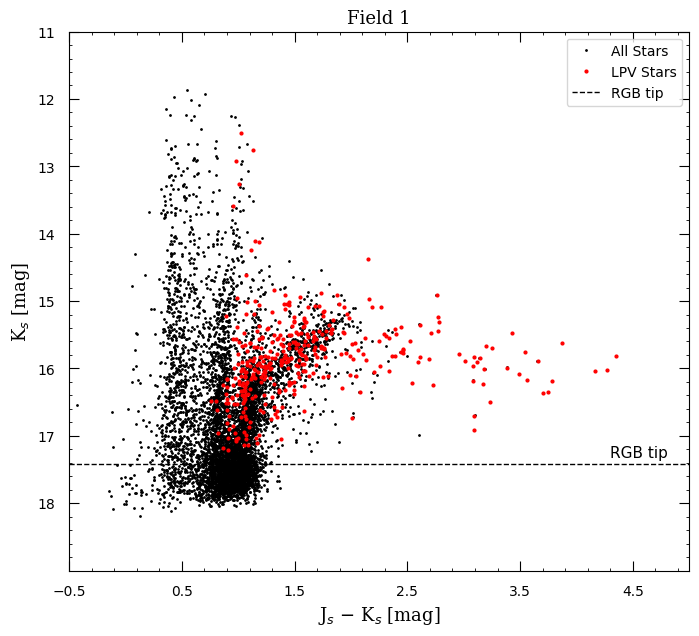

In [9]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5 , -0.5
ymax , ymin = 19  , 11 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#All stars
plt.plot((df_Whitelock['Jmag(mag)']-Aj) - (df_Whitelock['Ksmag(mag)']-Ak), (df_Whitelock['Ksmag(mag)']-Ak) ,'k.', markersize = '2', label = 'All Stars')
plt.plot(X, Y,'r.', markersize = '4', label = 'LPV Stars')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Adding Isochrones

In [10]:
!pip install git+https://github.com/Mahdi-Abdollahii/AstroDC.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/Mahdi-Abdollahii/AstroDC.git to /tmp/pip-req-build-g3suhi7b
  Running command git clone --filter=blob:none --quiet https://github.com/Mahdi-Abdollahii/AstroDC.git /tmp/pip-req-build-g3suhi7b
  Resolved https://github.com/Mahdi-Abdollahii/AstroDC.git to commit 12047a307121ea075f7e1ac0a2e52806a7886b8d
  Preparing metadata (setup.py) ... done
  Created wheel for AstroDC: filename=AstroDC-1.0.4-py3-none-any.whl size=2573 sha256=9072bfe9ea533f643f630909551f31966fd7459d415f6c35fba30ab95c86be0a
  Stored in directory: /tmp/pip-ephem-wheel-cache-lxmbgamy/wheels/82/b8/db/4179fef6fc03770dd498d786816b5f961dce1b9a70bd9499cd
Successfully built AstroDC


In [11]:
from AstroDC import AstroDC

In [12]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_01.dat','ISO_01')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 14:16:13 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [13]:
AstroDC.Stev_Isochrone_CSV('/content/NGC_6822/Data_Isochrones/ISO_'+ Z_name +'_1.dat','ISO_1')

# File generated by CMD 3.7 (http://stev.oapd.inaf.it/cmd) on Sun Jan 29 14:14:31 CET 2023
# isochrones based on PARSEC release v1.2S +  COLIBRI S_37 + S_35 + PR16
# Basic references: Bressan et al. (2012), MNRAS, 427, 127 + Chen et al. (2014, 2015), MNRAS, 444, 2525 + MNRAS, 452, 1068 + Tang et al. (2014), MNRAS, 445, 4287 + Marigo et al. (2017), ApJ, 835, 77 + Pastorelli al. (2019), MNRAS, 485, 5666 + Pastorelli al. (2020), MNRAS, in press
# Thermal pulse cycles included 
# On RGB, assumed Reimers mass loss with efficiency eta=0.1
# LPV periods and growth rates added cf. Trabucchi et al. (2019)
# but fundamental-mode LPV periods are from Trabucchi et al. (2021)
# Photometric system: <i>UBVRIJHK</i> (cf. Maiz-Apellaniz 2006 + Bessell 1990)
# Attention: photometry includes extinction of Av=0.77, with coefficients derived for the Sun, for Cardelli et al 89 + O'Donnell 94 Rv=3.1 extinction curve.
# Using OBC version of bolometric corrections as detailed in Marigo et al. (2008, A&A 482, 8

In [14]:
ISO_df_01= pd.read_csv("ISO_01.csv")
ISO_df_01['logAge'] = round(ISO_df_01['logAge'], 3)
ISO_df_01 = ISO_df_01[ISO_df_01['Kmag'] < 30]
ISO_df_01

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.0002,-1.89055,6.60,0.090000,1.081690,0.090,-1.504,3.5569,4.076,0,...,0.000200,8.530,14.393,12.407,10.541,9.379,8.362,7.102,6.425,6.167
1,0.0002,-1.89055,6.60,0.092410,1.104386,0.092,-1.491,3.5581,4.080,0,...,0.000200,8.498,14.323,12.354,10.498,9.340,8.329,7.074,6.398,6.139
2,0.0002,-1.89055,6.60,0.098354,1.157207,0.098,-1.458,3.5611,4.086,0,...,0.000200,8.416,14.152,12.223,10.390,9.242,8.244,7.000,6.324,6.065
3,0.0002,-1.89055,6.60,0.100000,1.171106,0.100,-1.449,3.5619,4.087,0,...,0.000200,8.393,14.105,12.187,10.360,9.215,8.221,6.979,6.304,6.045
4,0.0002,-1.89055,6.60,0.106611,1.224073,0.107,-1.417,3.5650,4.095,0,...,0.000200,8.313,13.932,12.056,10.252,9.118,8.138,6.906,6.233,5.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18488,0.0002,-1.89055,10.05,0.818774,2.425117,0.790,3.237,3.6424,0.620,7,...,0.000199,-3.322,0.983,-0.281,-1.883,-2.763,-3.550,-4.610,-5.354,-5.494
18489,0.0002,-1.89055,10.05,0.818774,2.425117,0.790,3.285,3.6388,0.558,7,...,0.000200,-3.442,1.042,-0.303,-1.960,-2.864,-3.666,-4.742,-5.497,-5.638
18490,0.0002,-1.89055,10.05,0.818774,2.425117,0.790,3.298,3.6379,0.541,7,...,0.000200,-3.474,1.059,-0.308,-1.980,-2.891,-3.697,-4.778,-5.536,-5.677
18491,0.0002,-1.89055,10.05,0.818774,2.425118,0.790,3.303,3.6336,0.519,8,...,0.000155,-3.487,1.222,-0.222,-1.945,-2.880,-3.701,-4.803,-5.575,-5.719


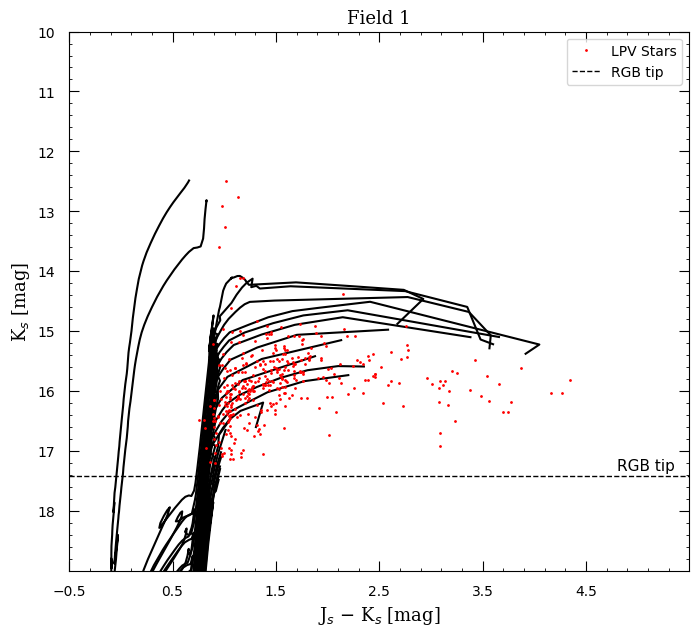

In [15]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [6.8,7,8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

In [16]:
ISO_df_1= pd.read_csv("ISO_1.csv")
ISO_df_1['logAge'] = round(ISO_df_1['logAge'], 3)
ISO_df_1 = ISO_df_1[ISO_df_1['Kmag'] < 30]
ISO_df_1

,Zini,MH,logAge,Mini,int_IMF,Mass,logL,logTe,logg,label,...,Z,mbolmag,Umag,Bmag,Vmag,Rmag,Imag,Jmag,Hmag,Kmag
0,0.0002,-1.89055,6.60,0.090000,1.081690,0.090,-1.504,3.5569,4.076,0,...,0.000200,8.530,14.393,12.407,10.541,9.379,8.362,7.102,6.425,6.167
1,0.0002,-1.89055,6.60,0.092410,1.104386,0.092,-1.491,3.5581,4.080,0,...,0.000200,8.498,14.323,12.354,10.498,9.340,8.329,7.074,6.398,6.139
2,0.0002,-1.89055,6.60,0.098354,1.157207,0.098,-1.458,3.5611,4.086,0,...,0.000200,8.416,14.152,12.223,10.390,9.242,8.244,7.000,6.324,6.065
3,0.0002,-1.89055,6.60,0.100000,1.171106,0.100,-1.449,3.5619,4.087,0,...,0.000200,8.393,14.105,12.187,10.360,9.215,8.221,6.979,6.304,6.045
4,0.0002,-1.89055,6.60,0.106611,1.224073,0.107,-1.417,3.5650,4.095,0,...,0.000200,8.313,13.932,12.056,10.252,9.118,8.138,6.906,6.233,5.972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18923,0.0002,-1.89055,10.05,0.818774,2.425117,0.790,3.285,3.6388,0.558,7,...,0.000200,-3.442,1.042,-0.303,-1.960,-2.864,-3.666,-4.742,-5.497,-5.638
18924,0.0002,-1.89055,10.05,0.818774,2.425117,0.790,3.298,3.6379,0.541,7,...,0.000200,-3.474,1.059,-0.308,-1.980,-2.891,-3.697,-4.778,-5.536,-5.677
18925,0.0002,-1.89055,10.05,0.818774,2.425118,0.790,3.303,3.6336,0.519,8,...,0.000155,-3.487,1.222,-0.222,-1.945,-2.880,-3.701,-4.803,-5.575,-5.719
18926,0.0002,-1.89055,10.05,0.818776,2.425118,0.750,2.990,3.6557,0.898,8,...,0.000155,-2.706,0.949,-0.008,-1.410,-2.204,-2.941,-3.942,-4.648,-4.783


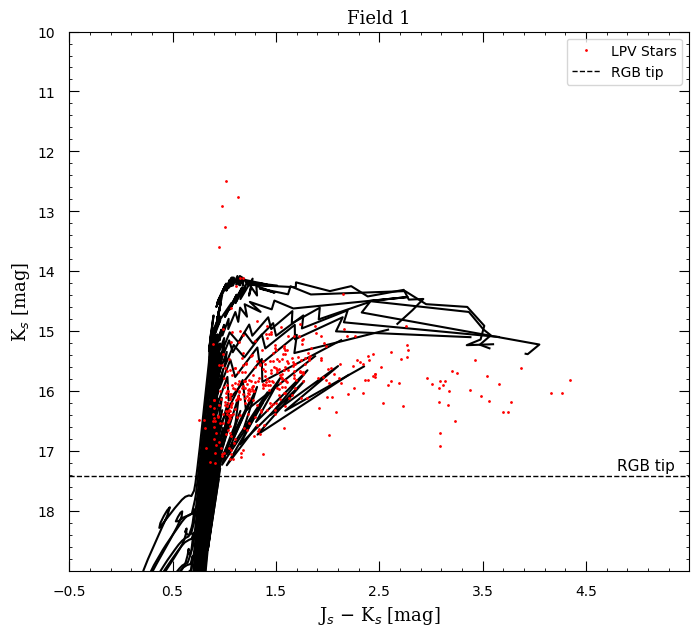

In [17]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]

LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Jmag'])  -  (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_1[ ISO_df_1['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')


#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 400)

# Data Correction

Selected years

In [18]:
LOG_AGE_ALL = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7,9.8,9.9,10,10.1]
LOG_AGE_C   = [8.8,8.9,9,9.1,9.2,9.3,9.4,9.5,9.6,9.7]
LOG_AGE_O   = [8,8.1,8.2,8.3,8.4,8.5,8.6,8.7,9.8,9.9,10,10.1]

limitation lines

In [19]:
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_peak_limit = (J_min) - ( K_min)

Unfortunately, the machine calculates wrong X for peak. So we set it manually.

In [20]:
X_peak_limit = 1.1

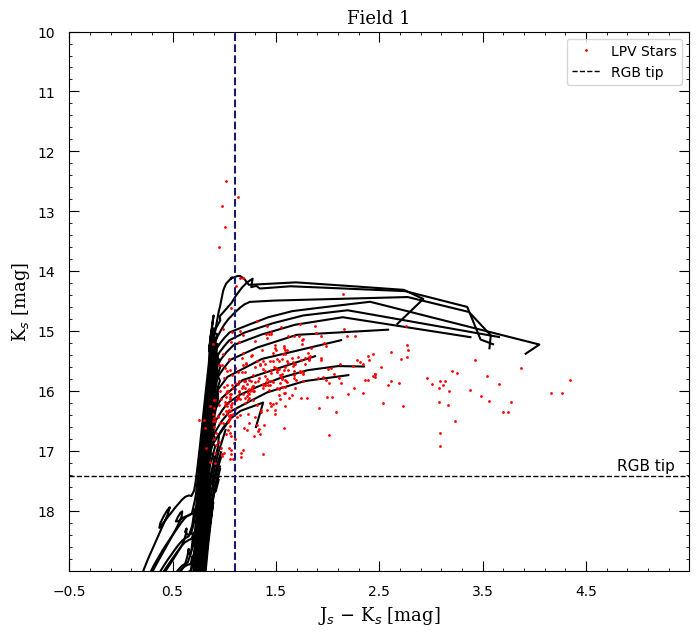

In [21]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

plt.legend(loc='upper right')
plt.savefig('CMD_peak_'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

Slope : Carbon

In [22]:
df_Correction_C = ISO_df_01
df_Correction_C['J_K'] = df_Correction_C['Jmag'] - df_Correction_C['Kmag']
df_Correction_C = df_Correction_C[df_Correction_C['logAge'].isin(LOG_AGE_C)]
df_Correction_C = df_Correction_C[df_Correction_C['Kmag'] + DM  < RGBT ]
df_Correction_C = df_Correction_C[df_Correction_C['J_K'] > X_peak_limit].reset_index(drop=True)

In [23]:
Slope_C = []
Slope_C_weight = []
for i in range(0,len(df_Correction_C)-1):
  Slope_C_prime = []
  Slope_C_weight_prime = []
  if df_Correction_C['logAge'][i+1] == df_Correction_C['logAge'][i] :
    K_diff = (df_Correction_C['Kmag'][i+1] - df_Correction_C['Kmag'][i])
    J_K_diff = df_Correction_C['J_K'][i+1] - df_Correction_C['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 :
        Slope_C_prime.append( K_diff / J_K_diff )
        Slope_C_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_C_weight_prime) > 0 : 
    Slope_C.append(sum((Slope_C_weight_prime / sum(Slope_C_weight_prime)) * Slope_C_prime))
    Slope_C_weight.append(sum(Slope_C_weight_prime))
Slope_C = sum((Slope_C_weight / sum(Slope_C_weight))*Slope_C)

Slope : Oxygen

In [24]:
LOG_AGE_O_prime = LOG_AGE_O[0:3]

df_Correction_O = ISO_df_01
df_Correction_O['J_K'] = df_Correction_O['Jmag'] - df_Correction_O['Kmag']
df_Correction_O = df_Correction_O[df_Correction_O['logAge'].isin(LOG_AGE_O_prime)]
df_Correction_O = df_Correction_O[df_Correction_O['Kmag'] + DM  < RGBT ]
df_Correction_O = df_Correction_O[df_Correction_O['J_K'] > X_peak_limit].reset_index(drop=True)

In [25]:
Slope_O = []
Slope_O_weight = []
for i in range(0,len(df_Correction_O)-1):
  Slope_O_prime = []
  Slope_O_weight_prime = []
  if df_Correction_O['logAge'][i+1] == df_Correction_O['logAge'][i] :
    K_diff = (df_Correction_O['Kmag'][i+1] - df_Correction_O['Kmag'][i])
    J_K_diff = df_Correction_O['J_K'][i+1] - df_Correction_O['J_K'][i]
    if J_K_diff > 0 :
      if K_diff / J_K_diff < 2 : 
        Slope_O_prime.append( K_diff / J_K_diff )
        Slope_O_weight_prime.append( ((K_diff**2)+(J_K_diff**2))**0.5 )
  if len(Slope_O_weight_prime) > 0 : 
    Slope_O.append(sum((Slope_O_weight_prime / sum(Slope_O_weight_prime)) * Slope_O_prime))
    Slope_O_weight.append(sum(Slope_O_weight_prime))
Slope_O = sum((Slope_O_weight / sum(Slope_O_weight))*Slope_O)

In [26]:
print('Slope_C : ' + str(Slope_C))
print('Slope_O : ' + str(Slope_O))

Slope_C : -0.47435102120588496
Slope_O : 0.06771017735787488


We can not have a negative slope. So we add these two parameters manually.

In [27]:
# From Z = 0.0005
Slope_C = 0.38
# From ....
Slope_O = 0.45

In [28]:
print('Slope_C : ' + str(Slope_C))
print('Slope_O : ' + str(Slope_O))

Slope_C : 0.38
Slope_O : 0.45


Slope : Visualization

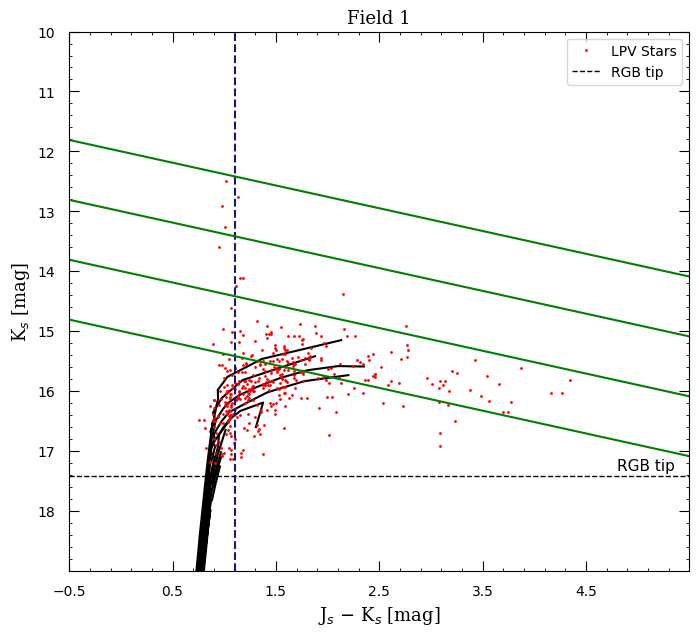

In [29]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

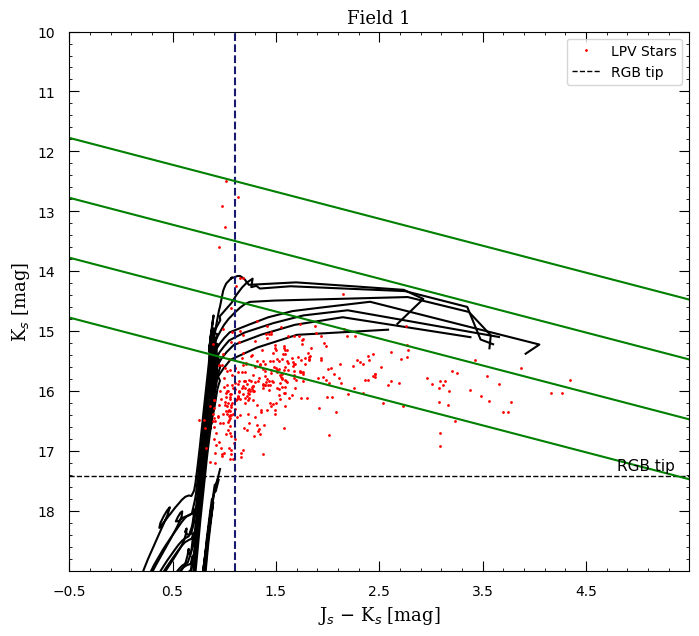

In [30]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_O
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = ( J_min - Aj )  -  ( K_min - Ak )
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slop lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_O * x + i , 'g')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

Calculation

In [31]:
df_prime = df[(df['J-Ks']) > X_peak_limit]
df_prime['Ks_Corrected_C'] = (df_prime['Ks']) + (Slope_C * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['Ks_Corrected_O'] = (df_prime['Ks']) + (Slope_O * (X_peak_limit-((df_prime['J'])-(df_prime['Ks']))))
df_prime['J-Ks_Corrected'] = X_peak_limit

In [32]:
X_Corrected_C =  df_prime['J-Ks_Corrected']
Y_Corrected_C =  df_prime['Ks_Corrected_C']

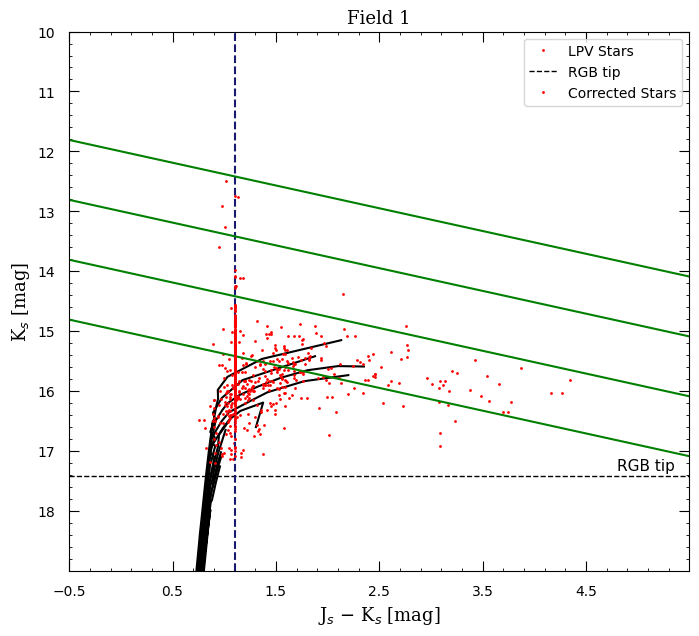

In [33]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_C
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#All stars
plt.plot(X, Y,'r.', markersize = '2', label = 'LPV Stars')
   
#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#Slope lines
x=np.linspace(xmin,xmax,10)
for i  in [12,13,14,15] :
  plt.plot(x, Slope_C * x + i , 'g')

#Corrected Stars with carbon slope
plt.plot(X_Corrected_C, Y_Corrected_C,'r.', markersize = '2', label = 'Corrected Stars')

plt.legend(loc='upper right')
#plt.savefig('CMD-Field1.jpeg', bbox_inches='tight', dpi = 1000)

In [34]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[ Mag_Mass['Z'] == Z].reset_index(drop=True)

In [35]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
0,0.0002,-0.200,-0.641,NaN,-11.832
1,0.0002,-0.186,-0.472,-11.832,-11.363
2,0.0002,-0.267,-1.393,-11.363,-10.894
3,0.0002,-0.561,-4.598,-10.894,-10.425
4,0.0002,-0.336,-2.252,-10.425,-9.956
5,0.0002,-0.989,-8.760,-9.956,-9.487
6,0.0002,-0.234,-1.589,-9.487,-9.018
7,0.0002,-0.277,-1.983,-9.018,-8.550
8,0.0002,-0.093,-0.404,-8.550,-8.081
9,0.0002,-0.172,-1.048,-8.081,-7.612


In [36]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [37]:
a,b = Mag_Mass_a_b_Calculator(Mag_Mass, df_prime['Ks_Corrected_C'].loc[df_prime.index[10]] - DM )

In [38]:
print(f'a: {a}   b: {b}')

a: -0.13   b: -0.731


$Log(M/M_s) = a \times K_s + b$

In [39]:
O_index = []
C_index = []
for i in df_prime.index:
  Ks = df_prime['Ks_Corrected_C'].loc[i] - DM
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, Ks)
  M = 10 ** (a * Ks + b)
  if M > 1.1 and M < 4 :
    C_index.append(i)
  else :
    O_index.append(i)

In [40]:
df_Corrected = df
for i in df_prime.index :
  print(i)
  df_Corrected.loc[i,'J-Ks'] = df_prime.loc[i,'J-Ks_Corrected']
  if i in C_index :
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_C']
    print('C Star --> ' + str(i) )
  else:
    df_Corrected.loc[i,'Ks'] = df_prime.loc[i,'Ks_Corrected_O']
    print('O Star --> ' + str(i) )

0
C Star --> 0
1
C Star --> 1
2
C Star --> 2
3
C Star --> 3
4
C Star --> 4
5
C Star --> 5
6
C Star --> 6
7
C Star --> 7
8
C Star --> 8
9
C Star --> 9
10
C Star --> 10
11
C Star --> 11
12
C Star --> 12
13
C Star --> 13
14
C Star --> 14
15
C Star --> 15
16
C Star --> 16
17
C Star --> 17
18
C Star --> 18
19
C Star --> 19
20
C Star --> 20
21
C Star --> 21
22
C Star --> 22
23
C Star --> 23
24
C Star --> 24
25
C Star --> 25
26
C Star --> 26
27
C Star --> 27
29
C Star --> 29
31
C Star --> 31
32
C Star --> 32
33
C Star --> 33
35
C Star --> 35
37
C Star --> 37
39
C Star --> 39
40
C Star --> 40
41
O Star --> 41
43
O Star --> 43
45
C Star --> 45
46
C Star --> 46
47
C Star --> 47
48
C Star --> 48
49
C Star --> 49
50
C Star --> 50
51
C Star --> 51
52
C Star --> 52
53
C Star --> 53
54
C Star --> 54
55
C Star --> 55
56
C Star --> 56
57
C Star --> 57
58
C Star --> 58
59
C Star --> 59
60
C Star --> 60
61
C Star --> 61
62
C Star --> 62
63
C Star --> 63
64
C Star --> 64
65
C Star --> 65
66
C Star --> 66


In [41]:
df_Corrected

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks
0,10870.00,296.178920,-14.822860,17.320,16.0820,S,0.055301,1.100
1,10784.00,296.215450,-14.834690,17.250,16.1224,S,0.036084,1.100
2,11004.00,296.273410,-14.808610,17.400,16.1620,S,0.043961,1.100
3,11029.00,296.283080,-14.804970,17.260,16.1462,S,0.053182,1.100
4,12050.00,296.254270,-14.817640,17.970,16.5388,S,0.029053,1.100
...,...,...,...,...,...,...,...,...
374,89.99,296.003693,-14.974893,18.192,17.1400,C,0.284993,1.052
375,10032.00,296.226960,-14.801910,14.280,13.2700,s,0.003049,1.010
376,10074.00,296.240050,-14.807960,14.540,13.5900,s,0.011856,0.950
377,20022.00,296.208160,-14.726160,13.890,12.7465,s,0.078605,1.100


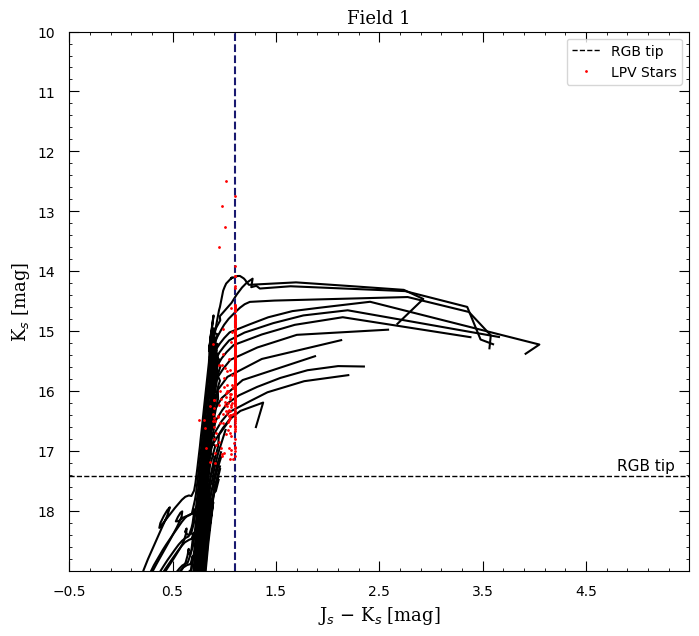

In [42]:
plt.figure(figsize = (8,7), dpi = 100)

plt.title('Field 1', fontsize = 13, fontname = "serif")

plt.tick_params(axis='both',which='major', length=7    ,pad=10,direction='in')
plt.tick_params(axis='y'   ,which='both' ,left= True   ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,bottom= True ,direction='in')
plt.tick_params(axis='x'   ,which='both' ,top= True    ,direction='in')
plt.tick_params(axis='y'   ,which='both' ,right= True  ,direction='in')
plt.minorticks_on()

xmax , xmin = 5.5 , -0.5
ymax , ymin = 19  , 10 

plt.xticks(np.arange(xmin , xmax , step=1))
plt.yticks(np.arange(ymin , ymax , step=1))
plt.xlim(xmin, xmax )
plt.ylim(ymax, ymin )

#Selected Stars 'LPV'
plt.xlabel('J$_s$ $-$ K$_s$ [mag]', fontsize = 13, fontname = "serif")
plt.ylabel('K$_s$ [mag]'          , fontsize = 13, fontname = "serif")

#ISO
LOG_AGE = LOG_AGE_ALL
for i in LOG_AGE : 
  X_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Jmag'])  -  (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag'])
  Y_ISO = (ISO_df_01[ ISO_df_01['logAge'] == i ]['Kmag']) + DM
  plt.plot(X_ISO,Y_ISO , 'k')

#RGBT
plt.axhline(y= RGBT , linewidth=1, color='k', linestyle='--', label = 'RGB tip')
plt.text( xmax - 0.7 , RGBT - 0.1 , 'RGB tip', fontsize=11)

#Correction lines
Index_min = ISO_df_01[ISO_df_01['logAge'] == 8].index[ISO_df_01[ISO_df_01['logAge'] == 8]['Kmag'] == min((ISO_df_01[ ISO_df_01['logAge'] == 8 ]['Kmag']))].tolist()[0]
J_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Jmag']) 
K_min = float(ISO_df_01[ISO_df_01.index == Index_min]['Kmag'])
X_min = (J_min)-(K_min)
plt.axvline(x = X_peak_limit , color='midnightblue', linestyle='--')

#All stars
plt.plot(df_Corrected['J-Ks'], df_Corrected['Ks'],'r.', markersize = '2', label = 'LPV Stars')

plt.legend(loc='upper right')
plt.savefig('Data-Correction-'+Z_name+'.jpeg', bbox_inches='tight', dpi = 1000)

# Parameters Calculation

In [43]:
df_final = df_Corrected
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks
0,10870.00,296.178920,-14.822860,17.320,16.0820,S,0.055301,1.100
1,10784.00,296.215450,-14.834690,17.250,16.1224,S,0.036084,1.100
2,11004.00,296.273410,-14.808610,17.400,16.1620,S,0.043961,1.100
3,11029.00,296.283080,-14.804970,17.260,16.1462,S,0.053182,1.100
4,12050.00,296.254270,-14.817640,17.970,16.5388,S,0.029053,1.100
...,...,...,...,...,...,...,...,...
374,89.99,296.003693,-14.974893,18.192,17.1400,C,0.284993,1.052
375,10032.00,296.226960,-14.801910,14.280,13.2700,s,0.003049,1.010
376,10074.00,296.240050,-14.807960,14.540,13.5900,s,0.011856,0.950
377,20022.00,296.208160,-14.726160,13.890,12.7465,s,0.078605,1.100


## Mag_Mass relation

$Log(M/M_s) = a \times K_s + b $

In [44]:
Mag_Mass = pd.read_csv('/content/NGC_6822/Data_Relations/Mag_Mass_relation_data.csv', encoding= 'unicode_escape')
Mag_Mass = Mag_Mass[Mag_Mass['Z'] == Z]

In [45]:
Mag_Mass

,Z,a,b,K validity range(lower limit),K validity range(upper limit)
42,0.0002,-0.200,-0.641,NaN,-11.832
43,0.0002,-0.186,-0.472,-11.832,-11.363
44,0.0002,-0.267,-1.393,-11.363,-10.894
45,0.0002,-0.561,-4.598,-10.894,-10.425
46,0.0002,-0.336,-2.252,-10.425,-9.956
47,0.0002,-0.989,-8.760,-9.956,-9.487
48,0.0002,-0.234,-1.589,-9.487,-9.018
49,0.0002,-0.277,-1.983,-9.018,-8.550
50,0.0002,-0.093,-0.404,-8.550,-8.081
51,0.0002,-0.172,-1.048,-8.081,-7.612


In [46]:
def Mag_Mass_a_b_Calculator(Relation_DataFrame, K_selected):
  if K_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif K_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['K validity range(upper limit)'] < K_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['K validity range(lower limit)'] == lower_limit ]['b'])
  return a , b

In [47]:
a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[df_final.index[10],'Ks'] - DM )
print(f'a: {a}   b: {b}')

a: -0.13   b: -0.731


In [48]:
df_final['Log(M/Ms)'] = np.nan
df_final['M/Ms'] = np.nan
for i in df_final.index :
  a , b = Mag_Mass_a_b_Calculator(Mag_Mass, df_final.loc[i,'Ks'] - DM )
  df_final.loc[i,'Log(M/Ms)'] = a * (df_final.loc[i,'Ks'] - DM) +  b
  df_final.loc[i,'M/Ms'] = pow( 10 , a * (df_final.loc[i,'Ks'] - DM) +  b )

In [49]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms
0,10870.00,296.178920,-14.822860,17.320,16.0820,S,0.055301,1.100,0.222464,1.669029
1,10784.00,296.215450,-14.834690,17.250,16.1224,S,0.036084,1.100,0.216485,1.646208
2,11004.00,296.273410,-14.808610,17.400,16.1620,S,0.043961,1.100,0.210624,1.624142
3,11029.00,296.283080,-14.804970,17.260,16.1462,S,0.053182,1.100,0.212962,1.632911
4,12050.00,296.254270,-14.817640,17.970,16.5388,S,0.029053,1.100,0.139194,1.377824
...,...,...,...,...,...,...,...,...,...,...
374,89.99,296.003693,-14.974893,18.192,17.1400,C,0.284993,1.052,0.035040,1.084027
375,10032.00,296.226960,-14.801910,14.280,13.2700,s,0.003049,1.010,1.153760,14.248200
376,10074.00,296.240050,-14.807960,14.540,13.5900,s,0.011856,0.950,0.943000,8.770008
377,20022.00,296.208160,-14.726160,13.890,12.7465,s,0.078605,1.100,1.320448,20.914525


(array([ 51., 164., 145.,  11.,   3.,   0.,   1.,   1.,   1.,   2.]),
 array([0.01424 , 0.157876, 0.301512, 0.445148, 0.588784, 0.73242 ,
        0.876056, 1.019692, 1.163328, 1.306964, 1.4506  ]),
 <BarContainer object of 10 artists>)

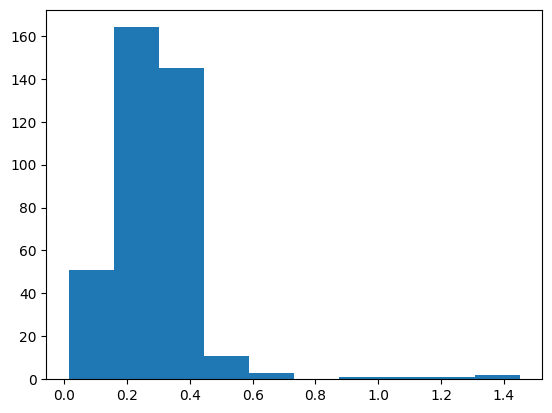

In [50]:
plt.hist(df_final['Log(M/Ms)'])

(array([371.,   3.,   1.,   0.,   1.,   1.,   0.,   1.,   0.,   1.]),
 array([ 1.03333229,  3.75227842,  6.47122456,  9.19017069, 11.90911682,
        14.62806295, 17.34700909, 20.06595522, 22.78490135, 25.50384749,
        28.22279362]),
 <BarContainer object of 10 artists>)

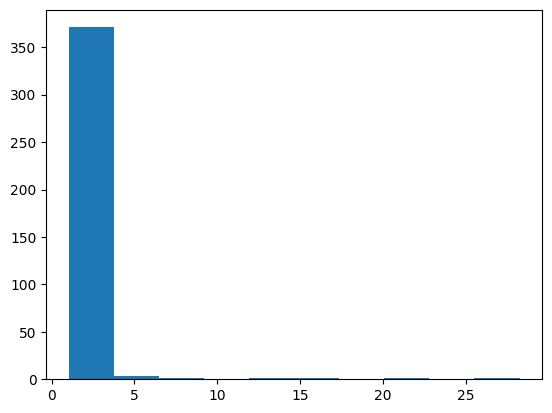

In [51]:
plt.hist(df_final['M/Ms'])

## Mass_Age relation

$ Log(t) = a \times Log(M/M_s) + b $

In [52]:
Mass_Age = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Age_relation_data.csv', encoding= 'unicode_escape')
Mass_Age = Mass_Age[Mass_Age['Z'] == Z]

In [53]:
Mass_Age

,Z,a,b,M validity range (lower limit),M validity range (upper limit)
40,0.0002,-3.205,9.764,NaN,0.125
41,0.0002,-2.672,9.698,0.125,0.367
42,0.0002,-2.368,9.586,0.367,0.609
43,0.0002,-1.996,9.359,0.609,0.851
44,0.0002,-1.676,9.087,0.851,1.093
45,0.0002,-1.249,8.620,1.093,1.335
46,0.0002,-0.871,8.117,1.335,1.576
47,0.0002,-0.601,7.691,1.576,NaN
48,0.0002,-3.209,9.766,NaN,0.126
49,0.0002,-2.645,9.695,0.126,0.368


In [54]:
def Mass_Age_a_b_Calculator(Relation_DataFrame, M_selected):
  if M_selected <= Relation_DataFrame.iloc[0][-1] : 
    a = Relation_DataFrame.iloc[0]['a']
    b = Relation_DataFrame.iloc[0]['b']
  elif M_selected >  Relation_DataFrame.iloc[-1][-2] :
    a = Relation_DataFrame.iloc[-1]['a']
    b = Relation_DataFrame.iloc[-1]['b']
  else:
    lower_limit = round(Relation_DataFrame[Relation_DataFrame['M validity range (upper limit)'] < M_selected].iloc[-1][-1],3)
    a = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['a'])
    b = float(Relation_DataFrame[Relation_DataFrame['M validity range (lower limit)'] == lower_limit ]['b'])
  return a , b

In [55]:
a , b = Mass_Age_a_b_Calculator(Mass_Age, df_final.loc[df_final.index[10],'Log(M/Ms)'])
print(f'a: {a}   b: {b}')

a: -2.377   b: 9.596


In [56]:
round(df_final.loc[288,'Log(M/Ms)'],3)

0.352

In [57]:
df_final['Log(t)'] = np.nan
df_final['t'] = np.nan
for i in df_final.index :
  a , b = Mass_Age_a_b_Calculator(Mass_Age, round(df_final.loc[i,'Log(M/Ms)'],3))
  df_final.loc[i,'Log(t)'] = a * (df_final.loc[i,'Log(M/Ms)']) +  b
  df_final.loc[i,'t'] = pow( 10 , df_final.loc[i,'Log(t)'] )

In [58]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms,Log(t),t
0,10870.00,296.178920,-14.822860,17.320,16.0820,S,0.055301,1.100,0.222464,1.669029,9.106583,1.278153e+09
1,10784.00,296.215450,-14.834690,17.250,16.1224,S,0.036084,1.100,0.216485,1.646208,9.122398,1.325555e+09
2,11004.00,296.273410,-14.808610,17.400,16.1620,S,0.043961,1.100,0.210624,1.624142,9.137900,1.373724e+09
3,11029.00,296.283080,-14.804970,17.260,16.1462,S,0.053182,1.100,0.212962,1.632911,9.131714,1.354299e+09
4,12050.00,296.254270,-14.817640,17.970,16.5388,S,0.029053,1.100,0.139194,1.377824,9.326833,2.122428e+09
...,...,...,...,...,...,...,...,...,...,...,...,...
374,89.99,296.003693,-14.974893,18.192,17.1400,C,0.284993,1.052,0.035040,1.084027,9.651697,4.484322e+09
375,10032.00,296.226960,-14.801910,14.280,13.2700,s,0.003049,1.010,1.153760,14.248200,7.180108,1.513936e+07
376,10074.00,296.240050,-14.807960,14.540,13.5900,s,0.011856,0.950,0.943000,8.770008,7.508475,3.224594e+07
377,20022.00,296.208160,-14.726160,13.890,12.7465,s,0.078605,1.100,1.320448,20.914525,6.972081,9.377367e+06


(array([  3.,   1.,   1.,   0.,   5.,  11., 115., 161.,  60.,  22.]),
 array([6.853978  , 7.14041628, 7.42685456, 7.71329284, 7.99973112,
        8.2861694 , 8.57260768, 8.85904596, 9.14548424, 9.43192252,
        9.7183608 ]),
 <BarContainer object of 10 artists>)

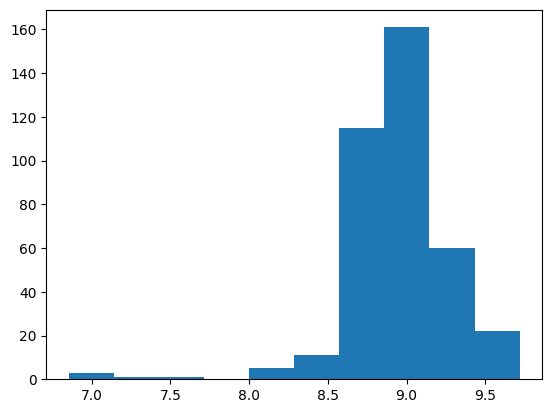

In [59]:
plt.hist(df_final['Log(t)'])

(array([ 53., 182.,  73.,  33.,  15.,   5.,   7.,   7.,   2.,   2.]),
 array([7.14460133e+06, 5.29260503e+08, 1.05137640e+09, 1.57349231e+09,
        2.09560821e+09, 2.61772411e+09, 3.13984001e+09, 3.66195591e+09,
        4.18407181e+09, 4.70618772e+09, 5.22830362e+09]),
 <BarContainer object of 10 artists>)

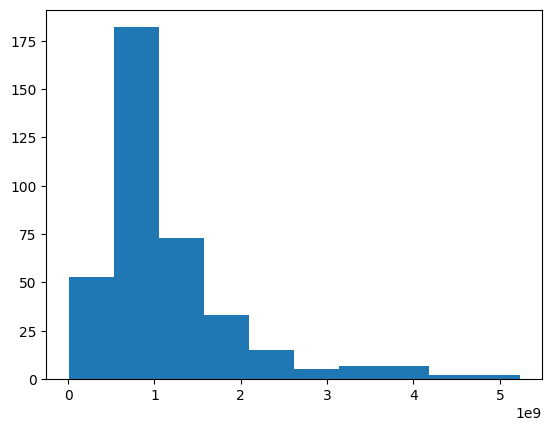

In [60]:
plt.hist(df_final['t'])

## Mass_Pulsation relation

In [61]:
Mass_Pulsation = pd.read_csv('/content/NGC_6822/Data_Relations/Mass_Pulsation_relation_data.csv', encoding= 'unicode_escape')
Mass_Pulsation = Mass_Pulsation[Mass_Pulsation['Z'] == Z]

In [62]:
Mass_Pulsation

,Z,I,a,b,c,D
8,0.0002,1,8.078,1.800,0.250,-9.812
9,0.0002,2,6.245,0.304,0.525,0.000
10,0.0002,3,2.626,0.679,0.217,0.000
11,0.0002,4,5.737,1.301,0.329,0.000
12,0.0002,1,2.840,1.423,0.250,-9.380
13,0.0002,2,0.436,0.226,0.094,0.000
14,0.0002,3,6.173,1.716,0.148,0.000
15,0.0002,4,6.440,0.594,0.876,0.000


In [63]:
def Mass_Pulsation_a_b_c_D_Calculator(Relation_DataFrame, i ):
  a = Relation_DataFrame.iloc[i-1]['a']
  b = Relation_DataFrame.iloc[i-1]['b']
  c = Relation_DataFrame.iloc[i-1]['c']
  D = Relation_DataFrame.iloc[0]['D']
  return a , b , c , D 

In [64]:
a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation,2)
print(f'a: {a}   b: {b}  c: {c}  D: {D}')

a: 6.245   b: 0.304  c: 0.525  D: -9.812


$ Log(δt) = Log(t) + D + Σ_1^4 a_i exp[-(Log(M/M_s) - b_i)^2 / c_i^2]$

In [65]:
df_final['Log(dt)'] = np.nan
df_final['dt'] = np.nan
for i in df_final.index :
  log_dt = []
  log_t = df_final.loc[i,'Log(t)']
  log_M_Ms = df_final.loc[i,'Log(M/Ms)']
  for j in range(1,5):
    a , b , c , D = Mass_Pulsation_a_b_c_D_Calculator(Mass_Pulsation, j )
    s = a * np.exp(-((log_M_Ms-b)**2)/(c**2))
    log_dt.append(s)
  
  df_final.loc[i,'Log(dt)'] = log_t + D + np.sum(log_dt)
  df_final.loc[i,'dt'] = pow( 10 , df_final.loc[i,'Log(dt)'] )

In [66]:
df_final

,Id-main,Ra(J2000) deg,Dec(J2000) deg,J,Ks,Types,DCG,J-Ks,Log(M/Ms),M/Ms,Log(t),t,Log(dt),dt
0,10870.00,296.178920,-14.822860,17.320,16.0820,S,0.055301,1.100,0.222464,1.669029,9.106583,1.278153e+09,5.422285,264414.066253
1,10784.00,296.215450,-14.834690,17.250,16.1224,S,0.036084,1.100,0.216485,1.646208,9.122398,1.325555e+09,5.412311,258410.975122
2,11004.00,296.273410,-14.808610,17.400,16.1620,S,0.043961,1.100,0.210624,1.624142,9.137900,1.373724e+09,5.401425,252014.460196
3,11029.00,296.283080,-14.804970,17.260,16.1462,S,0.053182,1.100,0.212962,1.632911,9.131714,1.354299e+09,5.405901,254625.037740
4,12050.00,296.254270,-14.817640,17.970,16.5388,S,0.029053,1.100,0.139194,1.377824,9.326833,2.122428e+09,5.179192,151074.798903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,89.99,296.003693,-14.974893,18.192,17.1400,C,0.284993,1.052,0.035040,1.084027,9.651697,4.484322e+09,4.643497,44004.481599
375,10032.00,296.226960,-14.801910,14.280,13.2700,s,0.003049,1.010,1.153760,14.248200,7.180108,1.513936e+07,2.550558,355.269337
376,10074.00,296.240050,-14.807960,14.540,13.5900,s,0.011856,0.950,0.943000,8.770008,7.508475,3.224594e+07,1.469530,29.480176
377,20022.00,296.208160,-14.726160,13.890,12.7465,s,0.078605,1.100,1.320448,20.914525,6.972081,9.377367e+06,3.228435,1692.135576


(array([  1.,   0.,   1.,   1.,   2.,   0.,   0.,   4.,  21., 349.]),
 array([1.46953007, 1.86898745, 2.26844483, 2.6679022 , 3.06735958,
        3.46681696, 3.86627433, 4.26573171, 4.66518908, 5.06464646,
        5.46410384]),
 <BarContainer object of 10 artists>)

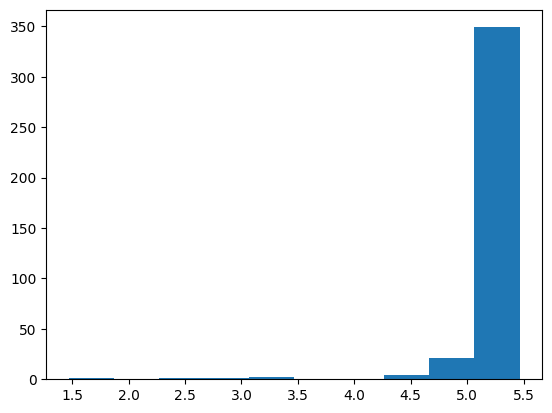

In [67]:
plt.hist(df_final['Log(dt)'])

(array([  5.,  10.,   9.,   6.,  11.,  14.,  16.,  28.,  70., 210.]),
 array([2.94801762e+01, 2.91406635e+04, 5.82518468e+04, 8.73630301e+04,
        1.16474213e+05, 1.45585397e+05, 1.74696580e+05, 2.03807763e+05,
        2.32918947e+05, 2.62030130e+05, 2.91141313e+05]),
 <BarContainer object of 10 artists>)

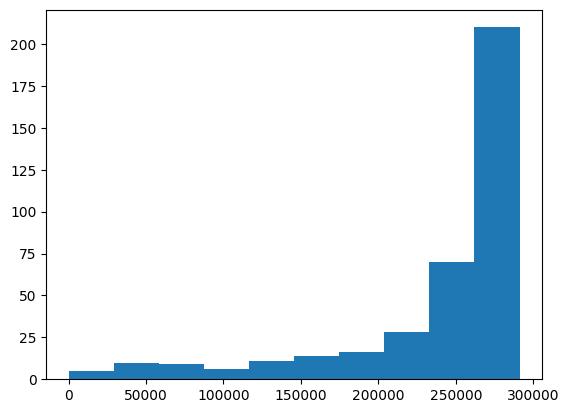

In [68]:
plt.hist(df_final['dt'])

## Data Saving

In [69]:
df_final.to_csv('NGC6822_LPV_Data_'+ Z_name +'.csv', index=False)